In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#importing inbuilt dataset in tensorflow
# there are total 10 type of clothing in this data and there image are reduced to size 28x28 and is in grayscale so less computing is required 
fmnist = tf.keras.datasets.fashion_mnist

In [4]:
#as dataset is sotred in the form of arrays so we need to first extract them in different variables

(train_image , train_label) , (test_image , test_label) = fmnist.load_data()

9


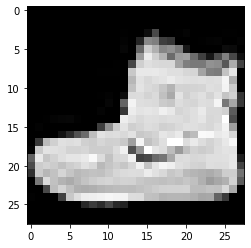

In [5]:
#visualising the dataset of fmnist on graph

#print(train_image[0])

# each clothing is labled from 0 to 9 and this sneaker is marked 9 this is what the below code will display
print(train_label[0])

plt.imshow(train_image[0] , cmap='gray')

In [6]:
# each value in train_image is in range of 0 to 255 as it depicts RGB so to normalise (making it to standard scale between 0 and 1) it we need to divide it by 255

train_image = train_image / 255
test_image = test_image / 255

## Building the Classification model



 **Sequential**: That defines a sequence of layers in the neural network.

**Flatten**:  our images were a 28x28 pixel matrix when we printed them out.Flatten just takes that 28x28 square matrix and turns it into a 1-dimensional array and the send the values inside the array as input to the first layer of neuron

**Dense**: Adds a layer of neurons

**Activation**
Each layer of neurons need an activation function to tell them what to do. There are a lot of options, but just use these for now:

**ReLU** effectively means:

if x > 0: 
  return x

else: 
  return 0
  
In other words, it only passes values 0 or greater to the next layer in the network.

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape =(28,28)),
    tf.keras.layers.Dense(512 , activation=tf.nn.relu),
    tf.keras.layers.Dense(10 , activation= tf.nn.softmax)

])

First we run the whole on 128 nodes and we get accuracy 88.829 the we use 512 nodes and we get 89.891 from this we can get that there is no large increase
 in accuracy.We use larger number of nodes to when the data is too complex(i.e. if we use coloured images instead of grey scaled) and the data we are handling is not that much complex so we didn't get much importvement in the accuracy bold text

In [8]:
# .compile is the function where the model checks th error and analyse for better result
# every time the accuracy of model is improved 


model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_image, train_label, epochs=100)

Epoch 1/100
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4760 - accuracy: 0.8308
Epoch 2/100
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3584 - accuracy: 0.8704
Epoch 3/100
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3233 - accuracy: 0.8814
Epoch 4/100
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2958 - accuracy: 0.8910
Epoch 5/100
1875/1875 [==============================] - 8s 5ms/step - loss: 0.2782 - accuracy: 0.8964
Epoch 6/100
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2641 - accuracy: 0.9012
Epoch 7/100
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2506 - accuracy: 0.9056
Epoch 8/100
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2405 - accuracy: 0.9087
Epoch 9/100
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2316 - accuracy: 0.9119
Epoch 10/100
1875/1875 [==============================] - 9s 5ms/step 

In [10]:
# to evaluate the accuracy of the model
model.evaluate(test_image, test_label)

313/313 [==============================] - 1s 3ms/step - loss: 0.8601 - accuracy: 0.8916


[0.8600794076919556, 0.8916000127792358]

##Epoch
if we want to stop the epoch at a particular accuracy or loss value so that we donot have to run the whole epoch, we can use ***Callbacks*** .

***Log*** - it stores every data like accuracy value , loss value , time etc of the epoch and '.get' can be used to get particular data we want


In [8]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self , epoch, log={}):
    if(log.get('loss') < 0.26 ):
      print('nLoss is lower than 0.26 so cancelling training!')
      self.model.stop_training = True
  
#Initantiating callback class

callbackit = myCallback()


In [9]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape =(28,28)),
    tf.keras.layers.Dense(128 , activation=tf.nn.relu),
    tf.keras.layers.Dense(10 , activation= tf.nn.softmax)

])

model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_image, train_label, epochs=40 , callbacks= [callbackit])

Epoch 1/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4982 - accuracy: 0.8254
Epoch 2/40
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3729 - accuracy: 0.8667
Epoch 3/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3348 - accuracy: 0.8768
Epoch 4/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3124 - accuracy: 0.8851
Epoch 5/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2948 - accuracy: 0.8905
Epoch 6/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2806 - accuracy: 0.8964
Epoch 7/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2676 - accuracy: 0.9001
Epoch 8/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2583 - accuracy: 0.9040
